In [64]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
data = pd.read_csv("../data/processed/diamonds_final.csv")

In [66]:
# Reset index để sử dụng positional index
data = data.reset_index(drop=True)

X = data.drop(columns=['price'])
y = data['price']

import json
with open("../data/splits/test_indices.json", "r") as f:
    test_idx = json.load(f)

# Chọn bằng iloc
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]


In [67]:
best_model = joblib.load("../models/best_model.pkl")
print("Model tốt nhất đã load xong!")

Model tốt nhất đã load xong!


In [68]:
y_pred = best_model.predict(X_test[best_model.named_steps['scaler'].feature_names_in_])

if 'log_price' in data.columns:
    y_pred = np.exp(y_pred)  # Chỉ nếu target log_price

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE trên tập test: {mae:.2f}")
print(f"RMSE trên tập test: {rmse:.2f}")


MAE trên tập test: 325.24
RMSE trên tập test: 564.14


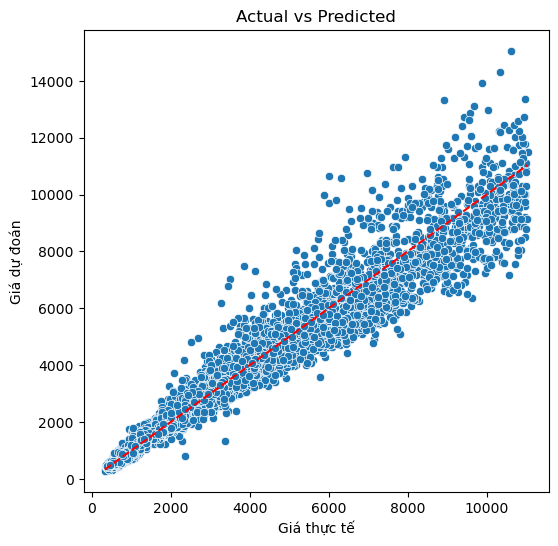

In [69]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


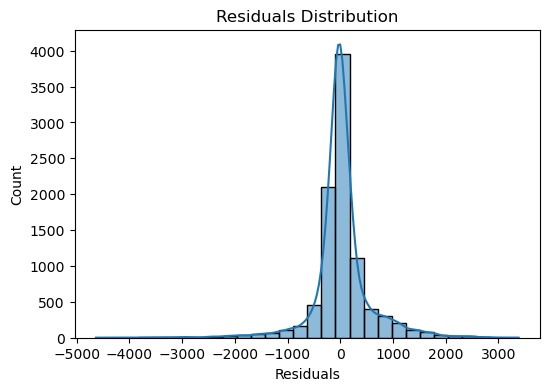

In [70]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()
